# Introduction to Data Science
## Homework 5

Student Name: Yiran Xu

Student Netid: yx1350
***

### Part 1: Naive Bayes

1\. From your reading you know that the naive Bayes classifier works by calculating the conditional probabilities of each feature, $e_i$, occuring with each class $c$ and treating them independently. This results in the probability of a certain class occuring given a set of features, or a piece of evidence, $E$, as

$$P(c \mid E) = \frac{p(e_1 \mid c) \cdot p(e_2 \mid c) \cdot \cdot \cdot p(e_k \mid c) \cdot p(c)}{p(E)}.$$

The conditional probability of each piece of evidence occuring with a given class is given by

$$P(e_i \mid c) = \frac{\text{count}(e_i, c)}{\text{count}(c)}.$$

In the above equation $\text{count}(e_i, c)$ is the number of documents in a given class that contain feature $e_i$ and $\text{count}(c)$ is the number of documents that belong to class $c$. 

A common variation of the above is to use Laplace (sometimes called +1) smoothing. Recall the use of Laplace smoothing introduced toward the end of Chapter 3 in the section Probability Estimation. This is done in sklearn by setting `alpha=1` in the `BernoulliNB()` function (this is also the default behavior). The result of Laplace smoothing will slightly change the conditional probabilities,

$$P(e_i \mid c) = \frac{\text{count}(e_i, c) + 1}{\text{count}(c) + 2}.$$

In no more than **one paragraph**, describe why this is useful. Try to think of a case when not using Laplace smoothing would result in "bad" models. Try to give an example. Be precise.

#### Answer:
By using laplace smoothing, one can avoid zero probability values. Thus, one can avoid overfitting. For example, if a feature $e_i$ never happened in the training set given the class $c$. That is, $\text{count}(e_i, c)=0$, then without laplace smoothing, 
$$P(e_i \mid c) = \frac{\text{count}(e_i, c)}{\text{count}(c)}=0.$$ Thus, $P(c \mid E)=0$. Therefore, no matter how strong evidences the other features $e_2$ to $e_k$ are toward class c, $P(c \mid E)$ will be zero. This is overfitting. Thus, to avoid the zero probability values, we can use laplace smoothing.

### Part 2: Text classification for sentiment analysis
For this part of the assignment, we are going to use a data set of movie ratings from IMDB.com. The data consists of the text of a movie review and a target variable which tells us whether the reviewer had a positive feeling towards the movie (equivalent to rating the movie between 7 and 10) or a negative feeling (rating the movie between 1 and 4). Neutral reactions are not included in the data.

The data are located in "`data/imdb.csv`". The first column is the review text; the second is the text label 'P' for positive or 'N' for negative.

1\. Load the data into a pandas `DataFrame()`.

In [1]:
import pandas as pd
data = pd.read_csv('imdb.csv') 

In [2]:
#to be deleted
data.head()

,Text,Class
0,'One of the first of the best musicals Anchors...,P
1,'Visually disjointed and full of itself the di...,N
2,'These type of movies about young teenagers st...,P
3,'I would rather of had my eyes gouged out with...,N
4,'The title says it all. Tail Gunner Joe was a ...,N


In [2]:
data.shape

(8500, 2)

2\. Code the target variable to be numeric: use the value `1` to represent 'P' and `0` to represent 'N'.

In [3]:
# Code here
data['Class'] = pd.Series(data['Class'] == 'P', dtype=int)

3\. Put all of the text into a data frame called `X` and the target variable in a data frame called `Y`. Make a train/test split where you give 75% of the data to training.

In [4]:
from sklearn.cross_validation import train_test_split

X = data['Text']
Y = data['Class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)

In [5]:
X_train.shape

(6375,)

4\. Create a binary `CountVectorizer()` and `TfidfVectorizer()`. Use the original single words as well as bigrams. Also, use an "english" stop word list. Fit these to the training data to extract a vocabulary and then transform both the train and test data.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Create a binary CountVectorizer()
#use original single words as well as bigrams(bigrams means two words)

count_vectorizer_single = CountVectorizer(binary=True,ngram_range=(1, 2),stop_words='english')
#count_vectorizer_single = CountVectorizer(binary=True,stop_words='english')
count_vectorizer_single.fit(X_train)
X_train_count_single = count_vectorizer_single.transform(X_train)
X_test_count_single = count_vectorizer_single.transform(X_test)


#TfidfVectorizer()
#tfidf_vectorizer_single = TfidfVectorizer(binary=True,stop_words='english')
tfidf_vectorizer_single = TfidfVectorizer(ngram_range=(1, 2),stop_words='english')
tfidf_vectorizer_single .fit(X_train)


X_train_tfidf_single= tfidf_vectorizer_single.transform(X_train)
X_test_tfidf_single= tfidf_vectorizer_single.transform(X_test)




In [8]:
list(count_vectorizer_single.vocabulary_.keys())[0:10]
list(tfidf_vectorizer_single.vocabulary_.keys())[0:10]

['survive parents',
 'accents whacky',
 'fights constant',
 'flashback sequence',
 'having picked',
 'actually scoring',
 'wasnt enthusiastic',
 'person pushed',
 'sense interrelationships',
 'worse end']

4\. Create `LogisticRegression()` and `BernoulliNB()` models. For all settings, keep the default values. In a single plot, show the AUC curve for both classifiers and both the binary and tfidf feature sets. In the legend, include the area under the ROC curve (AUC). Do not forget to label your axes. Your final plot will be a single window with 4 curves.

Which model do you think does a better job? Why? Explain in no more than a paragraph.

In [9]:
# Run this so your plots show properly
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 12

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
# Logistic Regression for CountVectorizer single word
LogisticModel = LogisticRegression()
LogisticModel.fit(X_train_count_single,Y_train)
#print ("Area under the ROC curve on the test data = %.3f" % metrics.roc_auc_score(LogisticModel.predict(X_test_count_single), Y_test)  )



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
# Logistic Regression for TfidfVectorizer single word
LogisticModel_tfidf = LogisticRegression()
LogisticModel_tfidf.fit(X_train_tfidf_single, Y_train)

#print ("Area under the ROC curve on the test data = %.3f" % metrics.roc_auc_score(LogisticModel_tfidf.predict(X_test_tfidf_signle), Y_test))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
from sklearn.naive_bayes import BernoulliNB
#BernoulliNB for CountVectorizer single word
BernoulliModel_count =BernoulliNB()
BernoulliModel_count.fit(X_train_count_single, Y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [13]:
##BernoulliNB for TfidfVectorizer single word
BernoulliModel_tfidf =BernoulliNB()
BernoulliModel_tfidf.fit(X_train_tfidf_single, Y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [14]:
#Function for plotting ROC (AUC)
import numpy as np
def plotUnivariateROC(preds, truth, label_string):
    '''
    preds is an nx1 array of predictions
    truth is an nx1 array of truth labels
    label_string is text to go into the plotting label
    '''
    #Student input code here
    #1. call the roc_curve function to get the ROC X and Y values
    fpr, tpr, thresholds = metrics.roc_curve(truth, preds)
    #2. Input fpr and tpr into the auc function to get the AUC
    roc_auc = metrics.auc(fpr, tpr)
    
    #we are doing this as a special case because we are sending unfitted predictions
    #into the function
    if roc_auc < 0.5:
        fpr, tpr, thresholds = roc_curve(truth, -1 * preds)
        roc_auc = auc(fpr, tpr)

    #chooses a random color for plotting
    c = (np.random.rand(), np.random.rand(), np.random.rand())

    #create a plot and set some options
    plt.plot(fpr, tpr, color = c, label = label_string + ' (AUC = %0.3f)' % roc_auc)
    

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")
    
    return roc_auc

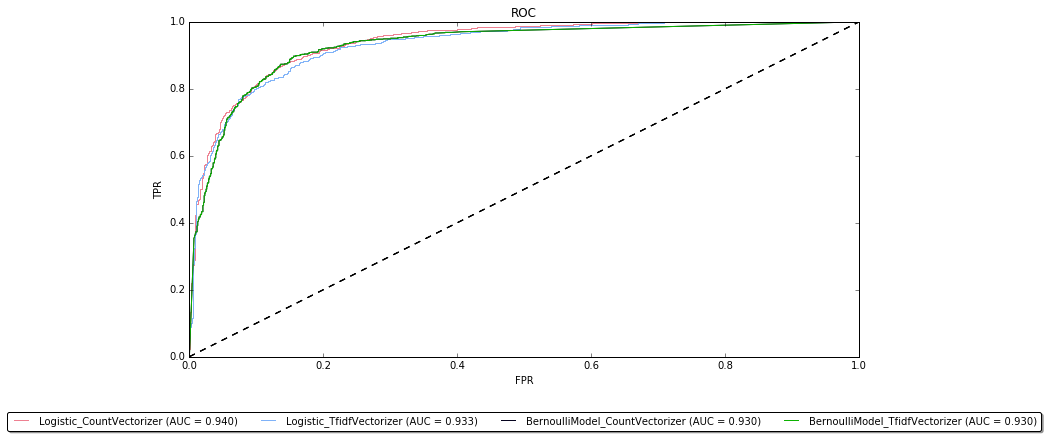

In [16]:
fig = plt.figure(figsize = (12, 6))
ax = plt.subplot(111)

#Plot the univariate AUC on the training data. Store the AUC

#Student put code here
#feature_auc_dict = {}
#for col in data.drop('y_buy',1).columns:
#feature_auc_dict[col] = plotUnivariateROC(data[col], Y, col)

#plotUnivariateROC(LogisticModel.predict(X_test_count_single),Y_test, 'Logistic_CountVectorizer(single)')
#plotUnivariateROC(LogisticModel_tfidf.predict(X_test_tfidf_signle),Y_test, 'Logistic_TfidfVectorizer(single)')
#plotUnivariateROC(BernoulliModel_count.predict(X_test_count_single),Y_test, 'BernoulliModel_CountVectorizer(single)')
#plotUnivariateROC(BernoulliModel_tfidf.predict(X_test_tfidf_signle),Y_test, 'BernoulliModel_TfidfVectorizer(single)')
#plotUnivariateROC(LogisticModel2.predict(X_test_count_bigram),Y_test, 'Logistic_CountVectorizer(bigran)')
#plotUnivariateROC(LogisticModel_tfidf2.predict(X_test_tfidf_bigram),Y_test, 'Logistic_TfidfVectorizer(bigran)')
#plotUnivariateROC(BernoulliModel_count2.predict(X_test_count_bigram),Y_test, 'BernoulliModel_CountVectorizer(bigram)')
#plotUnivariateROC(BernoulliModel_tfidf2.predict(X_test_tfidf_bigram),Y_test, 'BernoulliModel_TfidfVectorizer(bigram)')

plotUnivariateROC(LogisticModel.predict_proba(X_test_count_single)[:,1],Y_test, 'Logistic_CountVectorizer')
plotUnivariateROC(LogisticModel_tfidf.predict_proba(X_test_tfidf_single)[:,1],Y_test, 'Logistic_TfidfVectorizer')
plotUnivariateROC(BernoulliModel_count.predict_proba(X_test_count_single)[:,1],Y_test, 'BernoulliModel_CountVectorizer')
plotUnivariateROC(BernoulliModel_count.predict_proba(X_test_tfidf_single)[:,1],Y_test, 'BernoulliModel_TfidfVectorizer')
#plotUnivariateROC(LogisticModel2.predict_proba(X_test_count_bigram)[:,1],Y_test, 'Logistic_CountVectorizer(bigran)')
#plotUnivariateROC(LogisticModel_tfidf2.predict_proba(X_test_tfidf_bigram)[:,1],Y_test, 'Logistic_TfidfVectorizer(bigran)')
#plotUnivariateROC(BernoulliModel_count2.predict_proba(X_test_count_bigram)[:,1],Y_test, 'BernoulliModel_CountVectorizer(bigram)')
#plotUnivariateROC(BernoulliModel_tfidf2.predict_proba(X_test_tfidf_bigram)[:,1],Y_test, 'BernoulliModel_TfidfVectorizer(bigram)')



# Put a legend below current axis
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.0 , box.width, box.height * 1])
ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.15), fancybox = True, 
              shadow = True, ncol = 4, prop = {'size':10})

## Explaination: 
According to the graph above, logistic regression model is doing the best job. Specifically,Logistic regression with CountVectorizer is performing the best. The reasons are: Naive bayes model assumes that features are independent. Here, it means the BernoulliNB() model assumes that the words are independent. However, the words are not independent. Thus, the assumptions for BernoulliNB() is not met. Therefore, logistic regression performs better here. 

5\. Use the model from question 4 that you think did the best job and predict the rating of the test data. Find 5 examples the should have been positive, but were incorrectly classified as negative. Print out the reviews below and include an explanation as to why you think it may have been incorrectly classified. You can pick any 5. They do not have to be at random.

In [23]:
# Code here to display 5 incorrect reviews.
a=LogisticModel.predict(X_test_count_single)!=Y_test
a
b=a[a==True].index[0:5]
b

for i in range(len(b)):
    print("Real class is {0}.Review is{1}".format(Y_test[b[i]], X_test[b[i]]))
#1 menas positive. 0 means negative.

Real class is 0.Review is'Im a great admirer of Lon Chaney but the screen writing of this movie just did not work for me. The story jumps around oddly (Ive since learned that the film is missing a section) and characters appear and disappear with irritating suddenness. Some of the intertitles are overly explanatory (e.g. why youre not a child anymore!--cut back to picture for a long slow beat--youre a woman! yes we got it the first time) but there are a few talking sequences that beg for explanations that never appear. (Lets hear Luigi and his blond girlfriends argument please!) The plot which involves incestuous desires (figuratively if not technically) was disturbing to the point that it was hard to watch. To the writers credit this issue was treated as a problem and a May-December match is not portrayed as the right-and-good inevitability of some Mary Pickford films (e.g. Daddy-Long-Legs). Chaney gives a good performance as usual but I think he has been better-directed in the past--

### Explanation for the 5 reviews chosen here!
1. For the first review: There are many positive words in this review, especially in last few sentences, such as "good performance", "better-directed", "enjoy", "impressed", "charming". Thus, this review was classified as "positive" while it is actually a negative review.
2. For the second review: This review wrote about other similar movies first using words as "hokey", "embarrassing". Then, the writer wrote a lot of discriptive sentences in neutral tone. Thus, this review was classified as "negative" while it is actually a positive review. 
3. For the third review: This review has some positive words such as "very moving", "passionate", "higher vote", higher vote". Thus, this review was classified as "positive" while it is actually a negative review.
4. Fort the forth review: This one was like the first one. The reviewer used a lot of positive words in the begining to describe the pilot. Those words are "magic", "came alive", "enjoy", "faithfully", "faithfully", "enthralled", "good". Then, the reviewer began writing about the real review. Altough the reviewer did use some negative words, but negative words are not as much as positive onew.  Thus, this review was classified as "positive" while it is actually a negative review.
5. For the fifth review: This one used some positive words such as "intrigued", "pleasantly surprised", "nice" to describe the mood before watching the movie. Then, the reviewer used word like "recommend", "really developed", "desired". With some stopwords being removed, these words alone are positive. Thus, this review was classified as "positive" while it is actually a negative review.